# 1. Read all cleaned csv files

In [217]:
# Read all csv

import pandas as pd 

rfm_data = pd.read_csv('rfm_data.csv')
newcust_data = pd.read_csv('new_customer_cleaned.csv')
custdemo_data = pd.read_csv('customer_demography_cleaned.csv')
custadd_data = pd.read_csv('customer_address_cleaned.csv')


## RFM data

In [218]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3494 entries, 0 to 3493
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  3494 non-null   int64  
 1   recency      3494 non-null   int64  
 2   frequency    3494 non-null   int64  
 3   monetary     3494 non-null   float64
 4   r_score      3494 non-null   int64  
 5   f_score      3494 non-null   int64  
 6   m_score      3494 non-null   int64  
 7   rfm_score    3494 non-null   int64  
 8   Segment      3494 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 245.8+ KB


## New Customer data

In [219]:
newcust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           983 non-null    object 
 1   last_name                            983 non-null    object 
 2   gender                               983 non-null    object 
 3   past_3_years_bike_related_purchases  983 non-null    int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            983 non-null    object 
 6   job_industry_category                983 non-null    object 
 7   wealth_segment                       983 non-null    object 
 8   deceased_indicator                   983 non-null    object 
 9   owns_car                             983 non-null    object 
 10  tenure                               983 non-null    int64  
 11  address                         

## Customer demographic

In [220]:
custdemo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3913 non-null   int64  
 1   first_name                           3913 non-null   object 
 2   last_name                            3913 non-null   object 
 3   gender                               3913 non-null   object 
 4   past_3_years_bike_related_purchases  3913 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3913 non-null   object 
 7   job_industry_category                3913 non-null   object 
 8   wealth_segment                       3913 non-null   object 
 9   deceased_indicator                   3913 non-null   object 
 10  owns_car                             3913 non-null   object 
 11  tenure                        

## Customer Address

In [221]:
custadd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


# 2. State distribution for Segments

- Merge `custadd['state']` column with `rfm_data` df based on 'customer_id'.

In [222]:
custadd_data.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10


In [223]:
rfm_data.head(2)

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment
0,1,7,11,9084.45,5,5,5,555,Champions
1,2,128,3,4149.07,1,1,2,112,Lost Customers


In [224]:
len(custadd_data)

3999

In [225]:
len(rfm_data)

3494

- Length of custadd_data and rfm_data varies because we dropped some rows in transaction_data during cleaning.
(Check transaction_data_cleaning.ipynb)

In [226]:
rfm_with_state = pd.merge(rfm_data, custadd_data[['customer_id','state']], on ='customer_id')

In [227]:
rfm_with_state.head(2)

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment,state
0,1,7,11,9084.45,5,5,5,555,Champions,NSW
1,2,128,3,4149.07,1,1,2,112,Lost Customers,NSW


In [228]:
from collections import defaultdict, Counter

grouped_data = rfm_with_state.groupby('Segment')
segmentwise_states = defaultdict(str)
for segment, group in grouped_data:
    segmentwise_states[segment] = group['state'].tolist()
for keys, values in segmentwise_states.items():
    segmentwise_states[keys] = Counter(values)

segmentwise_states

defaultdict(str,
            {' At Risk': Counter({'NSW': 98,
                      'QLD': 49,
                      'VIC': 34,
                      'Victoria': 5}),
             'Average Customers': Counter({'NSW': 559,
                      'VIC': 237,
                      'QLD': 227,
                      'Victoria': 20}),
             'Champions': Counter({'NSW': 62,
                      'QLD': 34,
                      'VIC': 28,
                      'Victoria': 4}),
             'Lost Customers': Counter({'NSW': 594,
                      'VIC': 270,
                      'QLD': 246,
                      'Victoria': 37}),
             'Loyal Customers': Counter({'NSW': 116,
                      'VIC': 53,
                      'QLD': 38,
                      'Victoria': 6}),
             'New Customers': Counter({'NSW': 249,
                      'VIC': 103,
                      'QLD': 92,
                      'Victoria': 7}),
             'Potential Loyalists': Counter(

### Plots

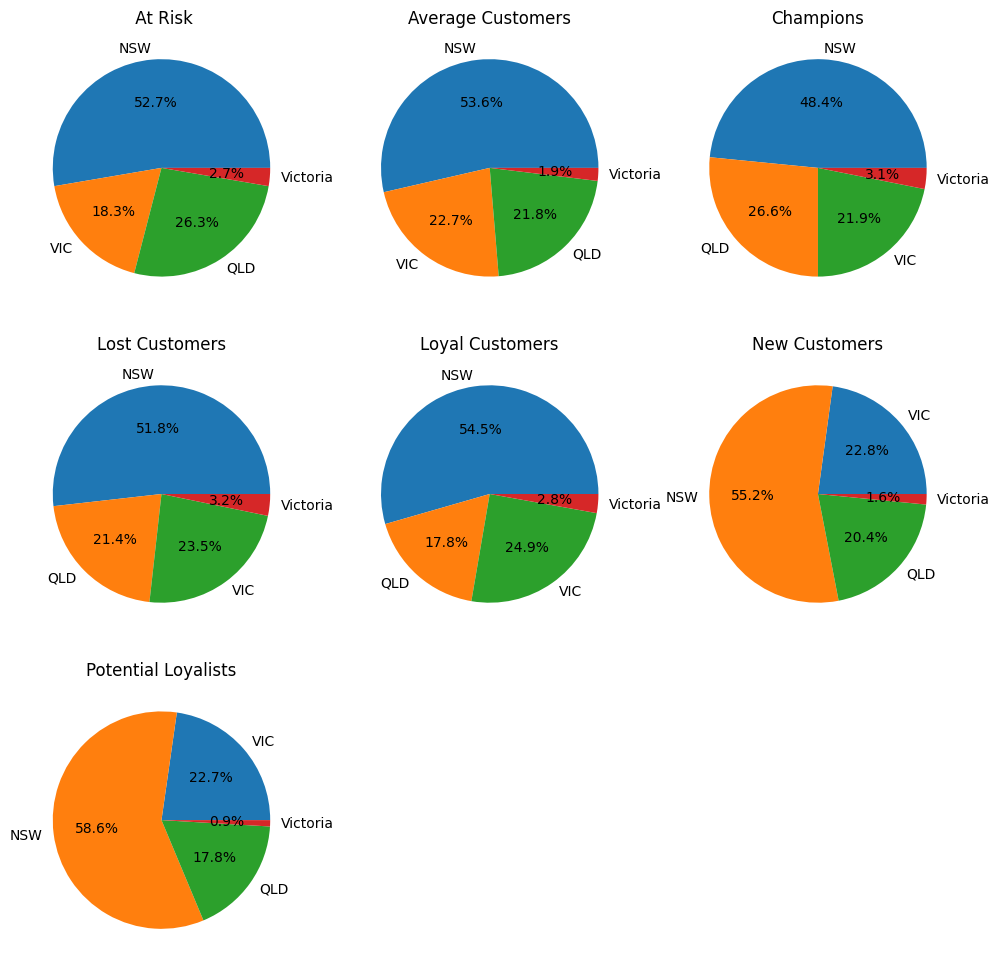

In [229]:
# Plot

from matplotlib import pyplot as plt 

num_segments = len(segmentwise_states)  # Number of segments(7)

# Set grid size
cols = 3
rows = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12,12))

axes = axes.flatten()   # Flatten axis to 1D array for easy indexing

# Loop over each segment and create pie chart
for i, (segment, state_counts) in enumerate(segmentwise_states.items()):
    ax = axes[i]
    ax.pie(
        state_counts.values(), # Sold item count in state
        labels = state_counts.keys(), # Name of state
        textprops={'fontsize': 10},
        autopct='%1.1f%%'
    )
    ax.set_title(segment)

    # Hide unused subplots
for j in range(i+1, len(axes)):  # i will be last index value from previous for loop
    fig.delaxes(axes[j])




### Analysis

1. NSW has highest share in all segments because NSW has maximum number of overall customers.
2. Victoria has least share in all segments because Victoria has minimum number of overall customers.

In [238]:
# No of customers from each state
statewise_customers = rfm_with_state.groupby('state').agg({'customer_id': 'count'})
statewise_customers.rename(columns={'customer_id':'number_of_customers'}, inplace=True)
statewise_customers

,number_of_customers
state,
NSW,1866
QLD,743
VIC,798
Victoria,82


# 3. State wise customer distribution

In [243]:
rfm_data.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment
0,1,7,11,9084.45,5,5,5,555,Champions
1,2,128,3,4149.07,1,1,2,112,Lost Customers
2,3,102,8,9888.23,1,4,5,145,At Risk
3,4,195,2,1047.72,1,1,1,111,Lost Customers
4,5,16,6,5903.20,4,3,3,433,Average Customers


In [255]:
# Group dataframe by state 
statewise_cust_group = rfm_with_state.groupby('state')

# Create a dictionary of statewise segments
statewise_segments = defaultdict(str)
for state, group in statewise_cust_group:
    statewise_segments[state] = group['Segment'].tolist()

for keys, values in statewise_segments.items():
    statewise_segments[keys] = Counter(values)

statewise_segments

defaultdict(str,
            {'NSW': Counter({'Lost Customers': 594,
                      'Average Customers': 559,
                      'New Customers': 249,
                      'Potential Loyalists': 188,
                      'Loyal Customers': 116,
                      ' At Risk': 98,
                      'Champions': 62}),
             'QLD': Counter({'Lost Customers': 246,
                      'Average Customers': 227,
                      'New Customers': 92,
                      'Potential Loyalists': 57,
                      ' At Risk': 49,
                      'Loyal Customers': 38,
                      'Champions': 34}),
             'VIC': Counter({'Lost Customers': 270,
                      'Average Customers': 237,
                      'New Customers': 103,
                      'Potential Loyalists': 73,
                      'Loyal Customers': 53,
                      ' At Risk': 34,
                      'Champions': 28}),
             'Victoria': Counte

Text(0.5, 1.0, 'Segments Distribution for State NSW')

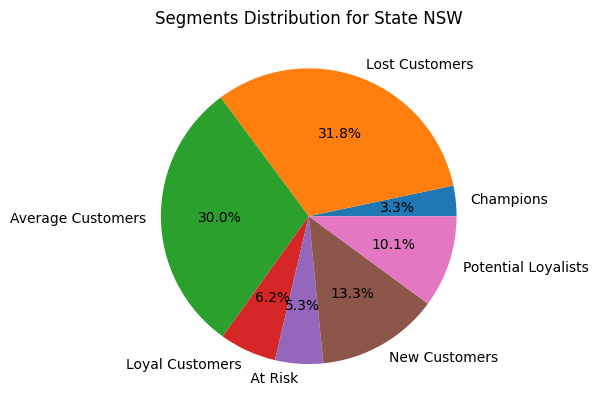

In [276]:
# Plot
x = [statewise_segments['NSW'].values()]

state1 = 'NSW'
cust_counts = statewise_segments[state1]

plt.pie(cust_counts.values(), labels=cust_counts.keys(), autopct='%1.1f%%')
plt.title(f'Segments Distribution for State {state1}')

AttributeError: 'str' object has no attribute 'get'

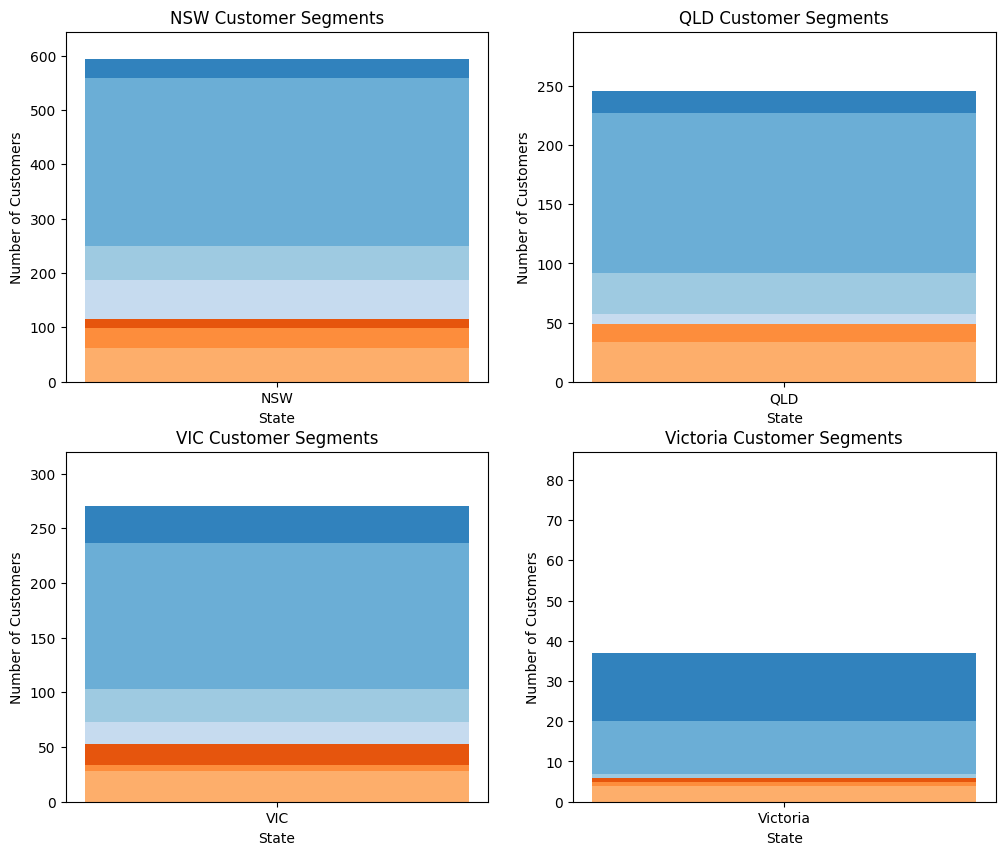

In [280]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = statewise_segments
# Segments (in order for consistent stacking)
segments = ['Lost Customers', 'Average Customers', 'New Customers', 'Potential Loyalists', 'Loyal Customers',
            ' At Risk', 'Champions']

# Create a color map for segments
colors = plt.cm.tab20c.colors

# Set up the subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot each state's data
for i, (state, counts) in enumerate(data.items()):
    values = [counts.get(segment, 0) for segment in segments]
    bottom = np.zeros(len(segments))
    
    for j, (value, color) in enumerate(zip(values, colors)):
        axes[i].bar(state, value, bottom=bottom[j], color=color, label=segments[j])
        bottom[j] += value
    
    axes[i].set_title(f'{state} Customer Segments')
    axes[i].set_ylabel('Number of Customers')
    axes[i].set_xlabel('State')
    axes[i].set_xticks([state])
    axes[i].set_ylim(0, max(bottom) + 50)

# Add legend
fig.legend(segments, loc='upper right', bbox_to_anchor=(1.1, 0.9))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
